# 任务三 文本分析与词云图绘制（二选一）

> （2）运用第三方包，对中文、英文评论文本进行情感分析，并对情感极性作描述性统计

In [1]:
import os,sys
SRC_DIR = os.path.join(os.path.abspath('.'), 'data')
print(SRC_DIR)

c:\Users\Administrator\WPSDrive\205034987\WPS云盘\07 绛亽新学习\01 电子商务\05 20级大四上学期\商务智能实验\notebook\data


In [2]:
# 中文语言处理包
%pip install snownlp

Looking in indexes: https://mirrors.tencent.com/pypi/simple
                                              0.0/37.6 MB ? eta -:--:--
                                              0.4/37.6 MB 13.1 MB/s eta 0:00:03
     -                                        1.0/37.6 MB 12.2 MB/s eta 0:00:04
     -                                        1.6/37.6 MB 12.4 MB/s eta 0:00:03
     --                                       2.1/37.6 MB 12.1 MB/s eta 0:00:03
     --                                       2.6/37.6 MB 12.9 MB/s eta 0:00:03
     ---                                      3.1/37.6 MB 12.3 MB/s eta 0:00:03
     ---                                      3.6/37.6 MB 12.2 MB/s eta 0:00:03
     ----                                     4.2/37.6 MB 12.1 MB/s eta 0:00:03
     -----                                    4.7/37.6 MB 12.0 MB/s eta 0:00:03
     -----                                    5.3/37.6 MB 12.0 MB/s eta 0:00:03
     ------                                   5.7/37.6 MB 11.8 MB/s 

In [3]:
import pandas as pd
import re
from snownlp import SnowNLP
import matplotlib.pyplot as plt

# 解决中文无法显示的问题
plt.rc('font', family='SimHei', size='12')

In [6]:
#做中文文本情感分析
reviews_detail_df_cc_中文=pd.read_csv(os.path.join(SRC_DIR,'_reviews_detail_chinese.csv'))
columns=['listing_id','comments']
reviews_detail_df_cc_中文=reviews_detail_df_cc_中文[columns]
reviews_detail_df_cc_中文.insert(2, 'comments_score', ' ')    # 在第三列插入新列
reviews_detail_df_cc_中文['comments_score'] = ''
reviews_detail_df_cc_中文.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169070 entries, 0 to 169069
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   listing_id      169070 non-null  int64 
 1   comments        169070 non-null  object
 2   comments_score  169070 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [7]:
# 定义情感得分评分函数
def get_sentiment_score(text):
    temp_score = SnowNLP(text)
    # 保留5位小数，采用四舍五入
    return float(format(temp_score.sentiments, '.5f'))
#计算每一条评论的情感倾向值
reviews_detail_df_cc_中文['comments_score'] = reviews_detail_df_cc_中文['comments'].apply(get_sentiment_score)
print(reviews_detail_df_cc_中文.head())

   listing_id                                           comments  \
0       44054  非常美好的一次入住体验,我们两家带着孩子和老人一共五大两小,在那里住的非常舒服,还给宝宝熬了...   
1       44054         房子非常好~小区非常棒~离地铁站非常近~~设施非常齐全~~服务非常到位~~完全满意~   
2       44054        房间外面看的景色不错,就是洗澡的龙头有点高,房间很好.很舒服,第一次来北京,暖气很足~   
3       44054                                                好!!   
4       44054           非常好的居住体验,交通便利,设施齐全,我们的房间在最顶层,客厅看出去的夜景不错｡   

   comments_score  
0         0.99991  
1         0.99995  
2         0.98670  
3         0.47391  
4         0.99995  


In [8]:
print(reviews_detail_df_cc_中文['comments_score'].describe(include='all'))

count    169070.000000
mean          0.854838
std           0.273482
min           0.000000
25%           0.862320
50%           0.990460
75%           0.999810
max           1.000000
Name: comments_score, dtype: float64


comments_score
(-0.002, 0.2]      495
(0.2, 0.4]         249
(0.4, 0.6]         775
(0.6, 0.8]        3008
(0.8, 1.0]       11890
Name: count, dtype: int64


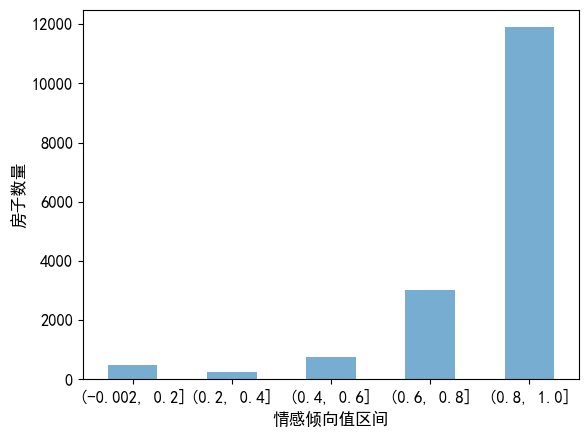

In [9]:
reviews_l_cs = reviews_detail_df_cc_中文.groupby('listing_id')['comments_score'].mean()
reviews_l_cs_5 = reviews_l_cs.value_counts(bins=5).sort_index()
print(reviews_l_cs_5)
# 绘制柱状图
reviews_l_cs_5.plot(kind='bar', alpha=0.6)
plt.xticks(rotation=360)
plt.xlabel("情感倾向值区间")
plt.ylabel("房子数量")
plt.show()

In [10]:
#做英文文本情感分析
reviews_detail_df_cc_英文=pd.read_csv(os.path.join(SRC_DIR,'_reviews_detail_english.csv'))
columns=['listing_id','comments']
reviews_detail_df_cc_英文=reviews_detail_df_cc_英文[columns]
reviews_detail_df_cc_英文.insert(2, 'comments_score', ' ')    # 在第三列插入新列
reviews_detail_df_cc_英文['comments_score'] = ''

In [11]:
reviews_detail_df_cc_英文=reviews_detail_df_cc_英文.dropna(axis=0,subset=['comments'])#删除comments为空值的行
reviews_detail_df_cc_英文.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32912 entries, 0 to 32911
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   listing_id      32912 non-null  int64 
 1   comments        32912 non-null  object
 2   comments_score  32912 non-null  object
dtypes: int64(1), object(2)
memory usage: 771.5+ KB


In [12]:
#计算每一条评论的情感倾向值
reviews_detail_df_cc_英文['comments_score'] = reviews_detail_df_cc_英文['comments'].apply(get_sentiment_score)
print(reviews_detail_df_cc_英文.head())

   listing_id                                           comments  \
0       44054  Sev was very helpful.  Sev showed us where to ...   
1       44054  We arrived in Beijing very early in the mornin...   
2       44054  It is a really massive apartment and really co...   
3       44054  Sev was incredibly helpful, showed us around t...   
4       44054  The appartment was ideal for our party of 6 ad...   

   comments_score  
0         0.03378  
1         0.00000  
2         0.85086  
3         0.00264  
4         0.00495  


In [13]:
print(reviews_detail_df_cc_英文['comments_score'].describe(include='all'))

count    32912.000000
mean         0.220718
std          0.322488
min          0.000000
25%          0.000790
50%          0.028955
75%          0.371650
max          1.000000
Name: comments_score, dtype: float64


comments_score
(-0.002, 0.2]    4407
(0.2, 0.4]       1643
(0.4, 0.6]        962
(0.6, 0.8]        359
(0.8, 1.0]        434
Name: count, dtype: int64


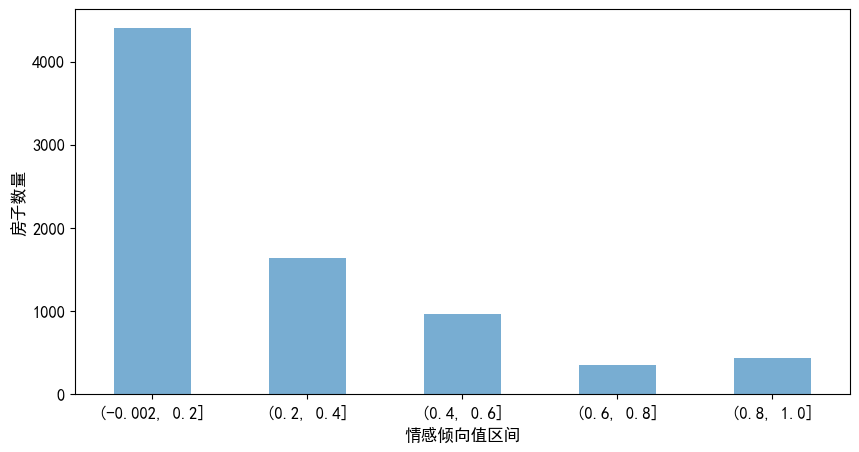

In [14]:
reviews_l_cs1 = reviews_detail_df_cc_英文.groupby('listing_id')['comments_score'].mean()
reviews_l_cs_51 = reviews_l_cs1.value_counts(bins=5).sort_index()
print(reviews_l_cs_51)
# 绘制柱状图
fig = plt.figure(figsize=(10,5))
reviews_l_cs_51.plot(kind='bar', alpha=0.6)
plt.xticks(rotation=360)
plt.xlabel("情感倾向值区间")
plt.ylabel("房子数量")
plt.show()

#
\- The End -